## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = data.drop_duplicates(["Mouse ID", "Timepoint"])
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [3]:
# Groupby Regimen
#summar_table = pd.DataFrame({}

# Gather Statistics
#summar_table["Mean"] = pd.DataFrame(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
#summar_table["Median"] = pd.DataFrame(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
#summar_table["Standard Deviation"] = pd.DataFrame(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
#summar_table["Variance"] = pd.DataFrame(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
#summar_table["SEM"] = pd.DataFrame(df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

# Set Headers
#summar_table = summar_table[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
#summar_table.head()

average = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

summary_table = pd.DataFrame({"Mean Tumor Volume": average,
                             "Median Tumor Volume": median,
                             "Variance Tumor Volume": var,
                             "Std. Error Tumor Volume": sem,
                             "Std. Dev Tumor Volume": std,})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Error Tumor Volume,Std. Dev Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.393463,50.909965,43.138803,0.525862,6.568014
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [4]:
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

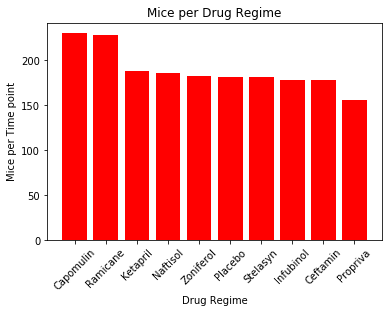

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

counts = clean_df["Drug Regimen"].value_counts()
drugs = counts.index.values
plt.bar(drugs, counts, color='r', align="center")
plt.xticks(rotation=45)
plt.xlabel("Drug Regime")
plt.ylabel("Mice per Time point")
plt.title("Mice per Drug Regime")
plt.show()

plt.savefig('barpn.png')

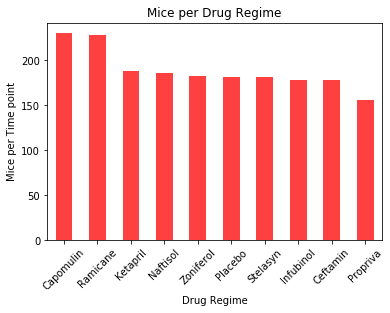

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

datapoints = clean_df["Drug Regimen"].value_counts()
datapoints.plot(kind="bar", figsize=(6,4), color = "r", legend=False, alpha=0.75, rot=45)
plt.title("Mice per Drug Regime")
plt.xlabel("Drug Regime")
plt.ylabel("Mice per Time point")
plt.show()

plt.savefig('barplt.png')

## Pie Plots

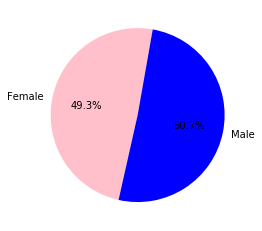

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = clean_df.groupby("Sex").count()["Mouse ID"]
colors = ['pink','blue']
plt.pie(counts.values,labels = counts.index.values, autopct = '%1.1f%%', startangle=80, colors=colors)

plt.show()

plt.savefig("PyPies.png")

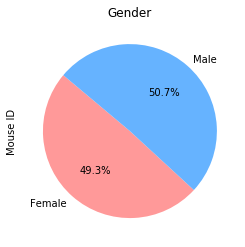

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

colors = ['#ff9999','#66b3ff']
counts.plot(kind="pie", labels=counts.index.values, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Gender")

plt.show()

plt.savefig("PltPies.png")

## Quartiles, Outliers and Boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Tumor Volume
tumor = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") | (clean_df["Drug Regimen"] == "Ramicane") | 
                     (clean_df["Drug Regimen"] == "Ceftamin") | (clean_df["Drug Regimen"] == "Propriva"), :]
tumor = tumor.sort_values("Timepoint", ascending = False)
    
# Quartiles
quartiles = tumor['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower = quartiles[0.25]
upper = quartiles[0.75]
iqr = upper-lower

print(f"The lower quartile of Tumor Volume is: {lower}")
print(f"The upper quartile of Tumor Volume is: {upper}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
print("-----------------------------------------------------")

bound1 = lower - (1.5*iqr)
bound2 = upper + (1.5*iqr)

print(f"Values below {bound1} are outliers.")
print(f"Values above {bound2} aree outliers.")


The lower quartile of Tumor Volume is: 40.153922065
The upper quartile of Tumor Volume is: 49.308879357500004
The interquartile range of Tumor Volume is: 9.1549572925
The the median of Tumor Volume is: 45.0 
-----------------------------------------------------
Values below 26.421486126250002 are outliers.
Values above 63.041315296250005 aree outliers.


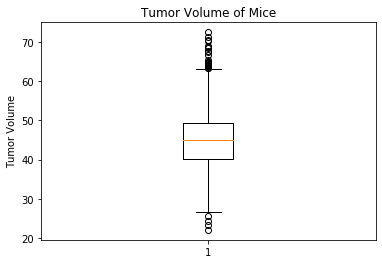

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

box = tumor['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(box)
plt.show()

plt.savefig("BoxPlot.png")

## Line and Scatter Plots

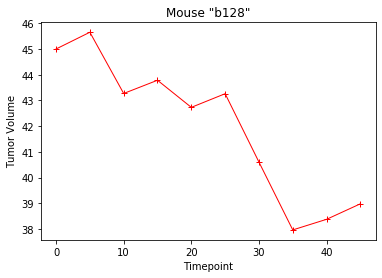

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
b128 = clean_df.loc[clean_df["Mouse ID"] == "b128", :]

time_point = b128["Timepoint"]
tumor_volume = b128["Tumor Volume (mm3)"]
plt.plot(time_point, tumor_volume, marker="+", color="red", linewidth=1)
plt.title('Mouse "b128"')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")


plt.show()

plt.savefig("LinePlot.png")

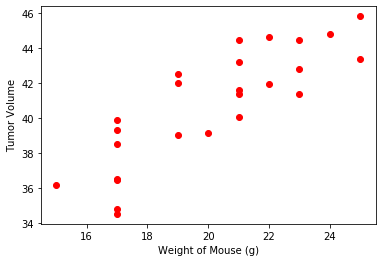

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#  x and y values
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
weight_avg = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].unique()
tumor = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Plot
plt.scatter(weight_avg ,tumor, color="red")
plt.xlabel("Weight of Mouse (g)")
plt.ylabel("Tumor Volume")
plt.show()

plt.savefig("ScatterPlot.png")

## Correlation and Regression

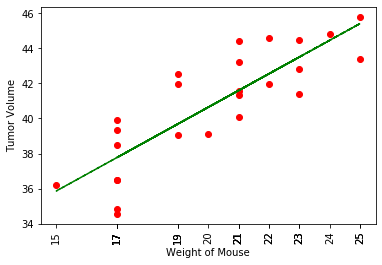

Correlation = 0.84


<Figure size 432x288 with 0 Axes>

In [13]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# x and y values
weight = capomulin.groupby(capomulin["Mouse ID"])["Weight (g)"].mean()
volume = capomulin.groupby(capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Linear regression
slope, int, r, p, std_err = st.linregress(weight, volume)
equ = slope * weight + int

# Plot
plt.scatter(weight, volume, color="red")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.plot(weight, equ, "--", color="green")
plt.xticks(weight, rotation=90)
plt.show()

# Correlation Coefficient
correlation = round(st.pearsonr(weight, volume)[0],2)

print(f'Correlation = {correlation}')

plt.savefig("L_regression.png")